# Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
heart_data=pd.read_csv("framingham[1].csv")
heart_data.drop(['education'],axis=1,inplace=True)
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
heart_data.rename(columns={'male':'Sex_male'},inplace=True)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [9]:
count=0
for i in heart_data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)

Total number of rows with missing values is  489


In [10]:
heart_data.dropna(axis=0,inplace=True)

## Logistic Regression

In [11]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import scipy.stats as st

In [12]:
from statsmodels.tools import add_constant as add_constant
heart_data_constant = add_constant(heart_data)
heart_data_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_data_constant.columns[:-1]
model=sm.Logit(heart_data.TenYearCHD,heart_data_constant[cols])
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.1169
Time:                        20:00:12   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
Sex_male            0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

In [19]:
import sklearn as sk
new_features=heart_data[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [21]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8706666666666667

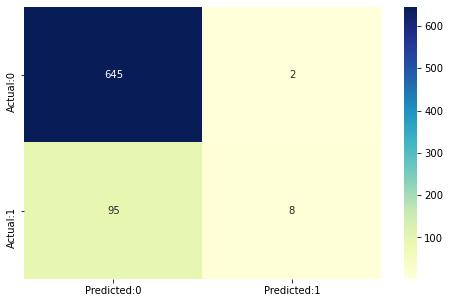

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")